In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
from statsmodels.graphics.tsaplots import plot_acf
import datetime
from datetime import timedelta

In [3]:
df_combined = pd.read_csv('data/2022-2024_Stats.csv')

In [4]:
df_combined.set_index('Date', inplace=True)

train_data, test_data = df_combined[0:int(len(df_combined)*0.9)], df_combined[int(len(df_combined)*0.9):]

train_arima = train_data['Closed']
test_arima = test_data['Closed']

# ARIMA Model

In [5]:
# Initialize history with training data
history = [x for x in train_arima]
y = test_arima
predictions = list()
residuals = list()  # List to store residuals

# Iterate over test data to make predictions
for i in range(0, len(y)):
    model = ARIMA(history, order=(7,1,1))
    model_fit = model.fit()
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions.append(yhat)
    # Get the observation from test data
    obs = y[i]
    # Calculate residual
    residual = obs - yhat
    residuals.append(residual)
    # Update the history with the observation
    history.append(obs)

C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [6]:
# report performance
mse = mean_squared_error(y, predictions)
print('MSE: '+str(mse))
mae = mean_absolute_error(y, predictions)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('RMSE: '+str(rmse))

MSE: 15744.107731040616
MAE: 77.35368444633241
RMSE: 125.47552642264792


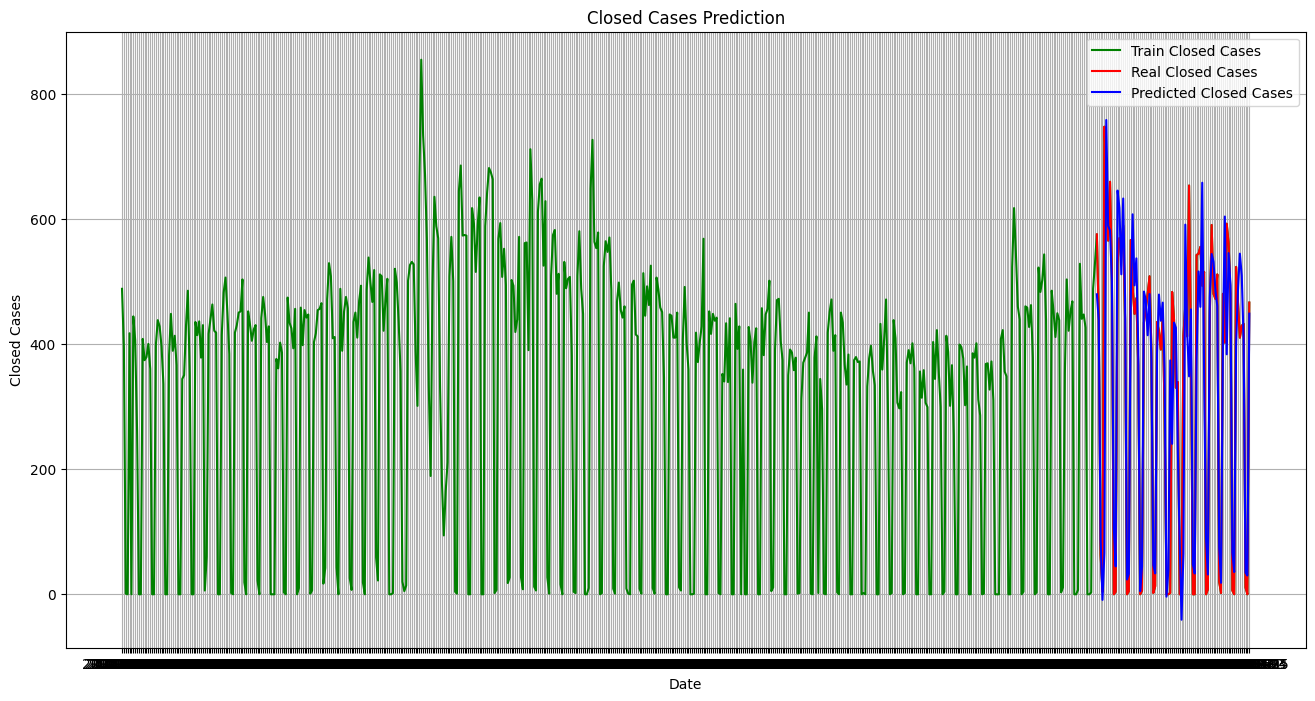

In [7]:
plt.figure(figsize=(16,8))
plt.plot(df_combined.index[-600:], df_combined['Closed'].tail(600), color='green', label = 'Train Closed Cases')
plt.plot(test_data.index, y, color = 'red', label = 'Real Closed Cases')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Closed Cases')
plt.title('Closed Cases Prediction')
plt.xlabel('Date')
plt.ylabel('Closed Cases')
plt.legend()
plt.grid(True)
plt.show()

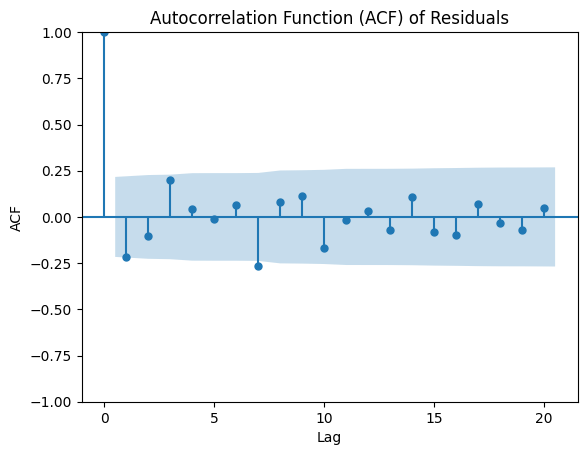

In [8]:
plot_acf(residuals, lags=20)  # Adjust 'lags' as needed
plt.title('Autocorrelation Function (ACF) of Residuals')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

## Predicting for 2024, by Week

In [9]:
last_2_months = df_combined[-90:-30]
print(len(last_2_months))

60


In [64]:
# Combine training data from 2022 and 2023
combined_train_data = last_2_months['Closed'] # Assuming test_arima contains data for 2022 and 2023

# Initialize history with combined training data
history = [x for x in combined_train_data]

predictions_2024 = list()

# Number of time steps to forecast for 2024
num_steps_2024 = 7

# Iterate over the number of time steps to make predictions for 2024
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(12, 1, 0)) # 12, 1, 0 is the best combination
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)

    # Update the history with the forecasted value
    history.append(yhat)

# Now predictions_2024 contains the predicted values for 2024

print(predictions_2024)

C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\Pytho

[2.114490370898295, 379.63538518182577, 515.1743570481669, 423.3521994947561, 513.5650215438096, 393.5000989498735, -25.417141584857916]


C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


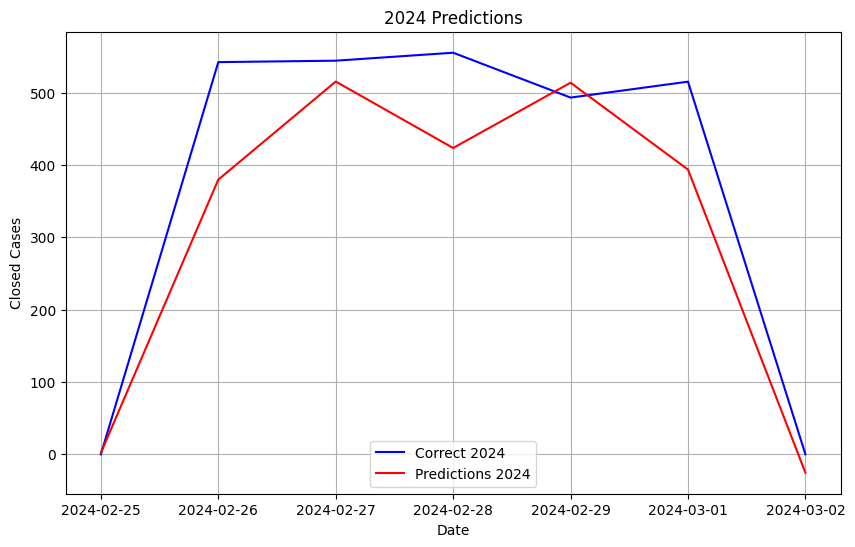

MSE: 8622.853919524337
MAE: 70.34780183213478
RMSE: 92.85932327733353
Measure error compared to the scale of actual values: 18.589453107774386


In [65]:
# Assuming your original data is in a pandas Series or DataFrame format
# and the index is a datetime index
# Create a time index for the 2024 period
start_date_2024 = pd.Timestamp('2024-02-25')
end_date_2024 = start_date_2024 + datetime.timedelta(days=6)
time_index_2024 = pd.date_range(start=start_date_2024, end=end_date_2024, freq='D')

filtered_values = df_combined.loc[str(start_date_2024.date()):str(end_date_2024.date()), 'Closed']

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(time_index_2024, filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024
plt.plot(time_index_2024, predictions_2024, label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('Closed Cases')
plt.legend()
plt.grid(True)
plt.show()

# Report performance
mse = mean_squared_error(filtered_values, predictions_2024)
print('MSE:', mse)
mae = mean_absolute_error(filtered_values, predictions_2024)
print('MAE:', mae)
rmse = math.sqrt(mean_squared_error(filtered_values, predictions_2024))
print('RMSE:', rmse)

mean_actual_values = filtered_values.mean()
error_percentage = (mae / mean_actual_values) * 100
print("Measure error compared to the scale of actual values:", error_percentage)

## Predicting for 2024, by Month

In [12]:
last_100_days = df_combined[-130:-30]
print(len(last_100_days))

100


In [68]:
# Combine training data from 2022 and 2023
combined_train_data = last_100_days['Closed'] # Assuming test_arima contains data for 2022 and 2023

# Initialize history with combined training data
history = [x for x in combined_train_data]

predictions_2024 = list()


# Number of time steps to forecast for 2024
num_steps_2024 = 30

# Iterate over the number of time steps to make predictions for 2024
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(12, 1, 0)) # 7, 1, 0 is the best combination
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)

    # Update the history with the forecasted value
    history.append(yhat)

# Now predictions_2024 contains the predicted values for 2024

print(predictions_2024)

C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\Pytho

[23.497356656337615, 384.8248746760505, 476.2849011517115, 407.39962412837895, 566.6620650384995, 396.41780686771153, 3.8538301259591776, 30.950599903593428, 373.536697944533, 434.8911041085208, 457.40115971708326, 552.3250488380515, 371.3228855584492, 30.455158267860384, 55.17312362514704, 355.6682274711793, 425.75537218392105, 468.65924190638316, 548.6945784397182, 358.1688847238505, 37.925849305438305, 81.66332482828662, 333.92181233923554, 419.83109041148657, 479.93738453866797, 540.1133555898739, 347.24782511438804, 51.63615658620006, 97.41185737434606, 319.4253267460963]


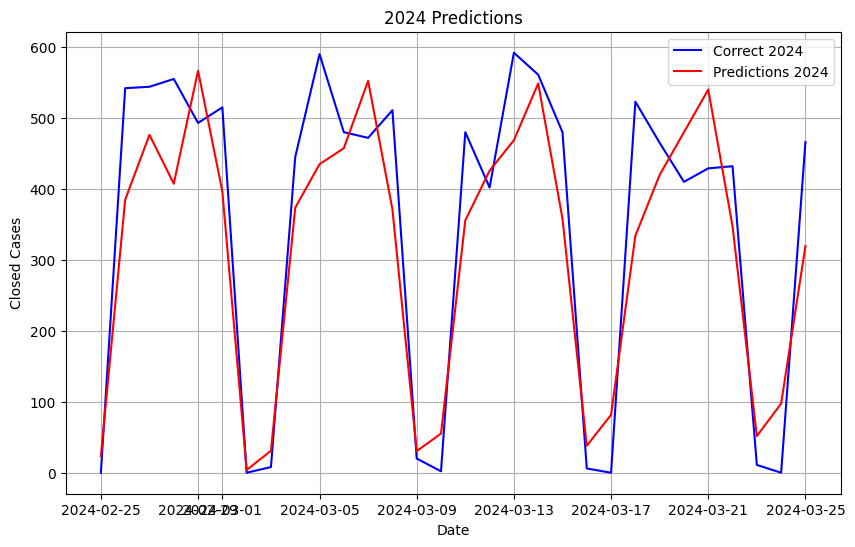

MSE: 9299.514809977509
MAE: 81.72214805191355
RMSE: 96.43399198403802
Measure error compared to the scale of actual values : 23.496879830912462


In [69]:
# Assuming your original data is in a pandas Series or DataFrame format
# and the index is a datetime index
# Create a time index for the 2024 period
start_date_2024 = pd.Timestamp('2024-02-25')
end_date_2024 = start_date_2024 + datetime.timedelta(days=29)
time_index_2024 = pd.date_range(start=start_date_2024, end=end_date_2024, freq='D')

filtered_values = df_combined.loc[str(start_date_2024.date()):str(end_date_2024.date()), 'Closed']

# # Plotting
plt.figure(figsize=(10, 6))

plt.plot(time_index_2024, filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024
plt.plot(time_index_2024, predictions_2024, label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('Closed Cases')
plt.legend()
plt.grid(True)
plt.show()

# report performance
mse = mean_squared_error(filtered_values, predictions_2024)
print('MSE: '+str(mse))
mae = mean_absolute_error(filtered_values, predictions_2024)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(filtered_values, predictions_2024))
print('RMSE: '+str(rmse))

mean_actual_values = filtered_values.mean()
error_percentage = (mae / mean_actual_values) * 100
print("Measure error compared to the scale of actual values :", error_percentage)

## Dynamic Updating of ARIMA by Week

In [56]:
df_2022_2024_testing = df_combined.copy()
df_2022_2024_testing = df_2022_2024_testing[-90:]

# df_2022_2024_testing.set_index('Date', inplace=True)
df_2022_2024_testing

,Open Balances,Closed,New Cases
Date,,,
2023-12-27,1851,440,514
2023-12-28,1831,447,498
2023-12-29,1780,426,401
2023-12-30,1755,0,232
2023-12-31,1987,0,186
...,...,...,...
2024-03-21,2521,429,428
2024-03-22,2499,432,406
2024-03-23,2473,11,211


In [57]:
open_balance_input = input("Enter today's Open Balance: ")
close_balance_input = input("Enter today's Close Balance: ")
new_balance_input = input("Enter today's New Balance: ")

try:
    open_balance = float(open_balance_input)
    close_balance = float(close_balance_input)
    new_balance = float(new_balance_input)
except ValueError:
    print("Error: Please enter valid numbers for balances.")
else:
    #today_date = datetime.now().strftime('%Y-%m-%d')  # Get today's date in YYYY-MM-DD format
    new_data = {
                'Open Balances': open_balance,
                'Closed': close_balance,
                'New Cases': new_balance
                }
    df_2022_2024_testing = df_2022_2024_testing.append(new_data, ignore_index=True)
    print("Values successfully added to DataFrame.")
    print(df_2022_2024_testing[-7:])

df_2022_2024_testing

Values successfully added to DataFrame.
    Open Balances  Closed  New Cases
84         2737.0   410.0      390.0
85         2521.0   429.0      428.0
86         2499.0   432.0      406.0
87         2473.0    11.0      211.0
88         2673.0     0.0      214.0
89         2737.0   466.0      445.0
90            NaN  2800.0        NaN


C:\Users\janic\AppData\Local\Temp\ipykernel_19880\396971195.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_2022_2024_testing = df_2022_2024_testing.append(new_data, ignore_index=True)


,Open Balances,Closed,New Cases
0,1851.0,440.0,514.0
1,1831.0,447.0,498.0
2,1780.0,426.0,401.0
3,1755.0,0.0,232.0
4,1987.0,0.0,186.0
...,...,...,...
86,2499.0,432.0,406.0
87,2473.0,11.0,211.0
88,2673.0,0.0,214.0
89,2737.0,466.0,445.0


In [58]:
# # Initialize an empty list to store predictions for 2024
predictions_2024 = []

# Number of time steps to forecast for each update
num_steps_2024 = 7

combined_train_data = df_2022_2024_testing['Closed']
history = combined_train_data.tolist()

if len(combined_train_data) >= 90:

    history.pop(0)  # Remove the oldest value from history
    combined_train_data.pop(0) # Remove the oldest value from combined_train_data
    df_2022_2024_testing = df_2022_2024_testing.drop(df_2022_2024_testing.index[0])

# Make predictions for the next 7 days
for i in range(num_steps_2024):
    # Fit ARIMA model with seasonal differencing
    model = ARIMA(history, order=(10, 1, 0)) # 7, 1, 0 is the best combination
    model_fit = model.fit()

    # Forecast the next value
    yhat = model_fit.forecast()[0]
    # Append the forecasted value to predictions
    predictions_2024.append(yhat)

    # Update the history with the forecasted value
    history.append(yhat)


#combined_train_data.pop(0)

# Now predictions_2024 contains the predicted values for 2024
print(len(combined_train_data))
print(predictions_2024)


C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\janic\Ap

90
[1201.0837832208263, 234.61585869538192, 484.3583131883139, 709.101287481187, -17.98049876335051, 1024.3942908195213, 2032.4174256576239]


C:\Users\janic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
print(len(history))
print(history)

97
[447.0, 426.0, 0.0, 0.0, 3.0, 488.0, 529.0, 575.0, 441.0, 63.0, 4.0, 747.0, 676.0, 565.0, 659.0, 510.0, 0.0, 4.0, 530.0, 569.0, 554.0, 589.0, 440.0, 0.0, 5.0, 566.0, 491.0, 448.0, 473.0, 365.0, 0.0, 6.0, 434.0, 456.0, 479.0, 508.0, 389.0, 2.0, 13.0, 435.0, 420.0, 391.0, 442.0, 292.0, 0.0, 0.0, 2.0, 483.0, 439.0, 330.0, 339.0, 0.0, 0.0, 413.0, 462.0, 412.0, 653.0, 388.0, 0.0, 0.0, 542.0, 544.0, 555.0, 493.0, 515.0, 0.0, 8.0, 445.0, 590.0, 480.0, 472.0, 511.0, 20.0, 2.0, 480.0, 402.0, 592.0, 561.0, 480.0, 6.0, 0.0, 523.0, 465.0, 410.0, 429.0, 432.0, 11.0, 0.0, 466.0, 2800.0, 1201.0837832208263, 234.61585869538192, 484.3583131883139, 709.101287481187, -17.98049876335051, 1024.3942908195213, 2032.4174256576239]


In [60]:
# start_date_2024 = pd.Timestamp.today().date()
# print(start_date_2024)
combined_train_data
df_2022_2024_testing

,Open Balances,Closed,New Cases
1,1831.0,447.0,498.0
2,1780.0,426.0,401.0
3,1755.0,0.0,232.0
4,1987.0,0.0,186.0
5,2173.0,3.0,406.0
...,...,...,...
86,2499.0,432.0,406.0
87,2473.0,11.0,211.0
88,2673.0,0.0,214.0
89,2737.0,466.0,445.0


In [61]:
# turn dataframe back into date index
today_date = pd.to_datetime('2024-03-26')

# 90 days prior
start_historical_date = today_date - timedelta(days=89)
# date range for 90 days
historical_date_range = pd.date_range(start=start_historical_date, end=today_date, freq='D')
print(len(historical_date_range))
# make date the index
df_2022_2024_testing.index = historical_date_range

df_2022_2024_testing

90


,Open Balances,Closed,New Cases
2023-12-28,1831.0,447.0,498.0
2023-12-29,1780.0,426.0,401.0
2023-12-30,1755.0,0.0,232.0
2023-12-31,1987.0,0.0,186.0
2024-01-01,2173.0,3.0,406.0
...,...,...,...
2024-03-22,2499.0,432.0,406.0
2024-03-23,2473.0,11.0,211.0
2024-03-24,2673.0,0.0,214.0
2024-03-25,2737.0,466.0,445.0


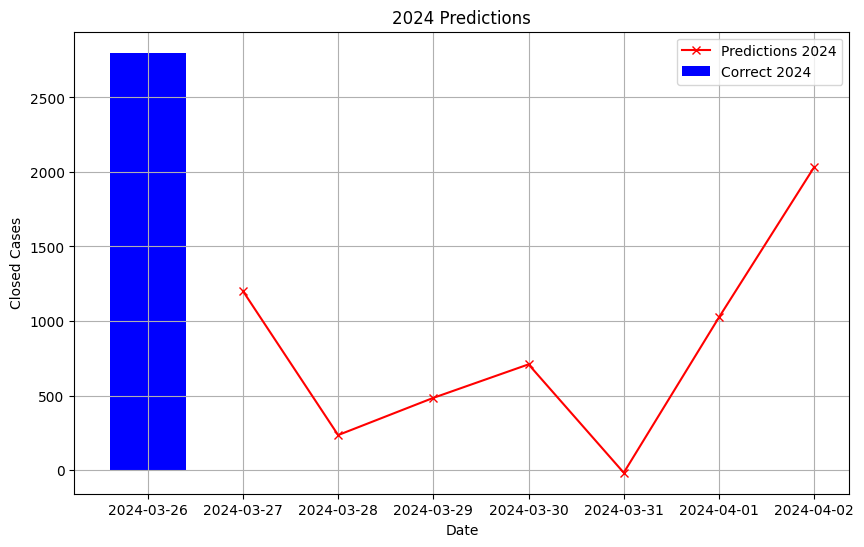

In [62]:
# Sample data for filtered_values
filtered_values = df_2022_2024_testing['Closed'][-1:]

# Calculate the start and end dates for predictions
pred_start_date = pd.Timestamp('2024-03-27')
pred_end_date = pred_start_date + pd.Timedelta(days=6)
time_index_2024 = pd.date_range(start=pred_start_date, end=pred_end_date, freq='D')

# Plotting
plt.figure(figsize=(10, 6))

# Plot filtered_values as a bar plot
plt.bar(df_2022_2024_testing.index[-1:], filtered_values, label='Correct 2024', color='blue')

# Plot predicted values for 2024 as a line plot
plt.plot(time_index_2024, predictions_2024, marker='x', label='Predictions 2024', color='red')

plt.title('2024 Predictions')
plt.xlabel('Date')
plt.ylabel('Closed Cases')
plt.legend()
plt.grid(True)
plt.show()
